# Class 2: Solution

## Data

In this exercise, we will work with data from Kayser et al. (2023) and the article "Coalition inclusion probabilities: a party-strategic measure for predicting policy and politics''. 

The paper develops a method to estimate coalition inclusion probabilities (CIPs). The idea is to predict the possibility of every possible coalition that could at each point in time. The probabilities take public opinion, polls, and bargaining leverage into account. To arrive at a party's probability of entering government, the different coalition combinations can then be summarized by party.

## Question 1: Working with Pandas Dataframes

### Exercise 1.0: Importing Pandas 

In [ ]:
# Start by importing pandas

### Solution 1.0

In [1]:
import pandas as pd

### Exercise 1.1: Reading data

Read in the dataset called `CIP_static_Denmark.csv`. 

*Hint:* Make sure to specify the correct delimiter. This is done using the `sep` parameter.

### Solution 1.1

In [2]:
fpath = '/home/rask/Dropbox/research/stigma-paper/data/CIP_static_Denmark.csv'
df = pd.read_csv(fpath, sep=';')

### Exercise 1.2: Inspecting the data

- Inspect the top rows of the dataframe
- Get info about the dataframe

### Solution 1.2

In [3]:
# Print top row rows
df.head()

,country,year,date,party_abbr,party_name,parlgov_id,pr_ingov_mean,pr_ingov_lower,pr_ingov_upper,excluding,excluding_parlgov_id
0,denmark,1947,13.11.1947,DKP,Communist Party of Denmark,1239,"0,014261","0,009332","0,02105",KF,590
1,denmark,1947,13.11.1947,DKP,Communist Party of Denmark,1239,"0,014583","0,009712","0,021344",RF,1606
2,denmark,1947,13.11.1947,DKP,Communist Party of Denmark,1239,"0,00889","0,005798","0,01305",RV,211
3,denmark,1947,13.11.1947,DKP,Communist Party of Denmark,1239,"0,004171","0,002714","0,006446",Sd,1629
4,denmark,1947,13.11.1947,DKP,Communist Party of Denmark,1239,"0,011073","0,006829","0,016755",V,1605


In [6]:
# Get info on the type of columns, the shape and so on
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3863 entries, 0 to 3862
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   country               3863 non-null   object
 1   year                  3863 non-null   int64 
 2   date                  3863 non-null   object
 3   party_abbr            3863 non-null   object
 4   party_name            3863 non-null   object
 5   parlgov_id            3863 non-null   int64 
 6   pr_ingov_mean         3863 non-null   object
 7   pr_ingov_lower        3863 non-null   object
 8   pr_ingov_upper        3863 non-null   object
 9   excluding             3495 non-null   object
 10  excluding_parlgov_id  3495 non-null   object
dtypes: int64(2), object(9)
memory usage: 332.1+ KB


### Exercise 1.3
We only want to keep CIPs from 1997 and onwards. Filter away any rows before 1997. 

*Hint:* Pay attention to the type of column. 

### Solution 1.3

In [7]:
df = df.loc[df['year'] >= 1997]

### Exercise 1.4

We only want to keep a subset of parties. This can be done using the `party_abbrv` column. 

Keep only parties abbreviated as A, DF, En-O, KF, NLA, NB, RV, Sd, SF, and V. 

Remember to reset indices.

*Hint:* Store the abbreviations in a list. Remember to enclose each element as a string. Using A results in NameError, but 'A' is accepted.

### Solution 1.4

In [8]:
parties = ['A', 'DF', 'En-O', 'KF', 'NLA', 'NB', 'RV', 'Sd', 'SF', 'V']

In [9]:
df = df.loc[df['party_abbr'].isin(parties)].reset_index(drop=True)

### Exercise 1.5

We are not happy with the current naming of the abbreviations. Below, you find a dictionary that creates the desired replacements.

*Hint*: The `.apply()` method does not work here. We need to use the `.map()` method. Give the replacement dictionary as input to `.map()`.

In [10]:
replacement_dict = {"A": "ALT",
                    "DF": "DF",
                    "En-O": "EL",
                    "KF": "KF",
                    "NLA": "LA",
                    "NB": "NB",
                    "RV": "RV",
                    "Sd": "S",
                    "SF": "SF",
                    "V": "V"}

### Solution 1.5

In [11]:
# Write solution here:
df['party_abbr'] = df['party_abbr'].map(replacement_dict)

### Exercise 1.6
Now we are happy with the current state of the data. Now we want to compute simple descriptive statistics to get to know our data even better.

However, when doing it we encounter problems. We realize that `pr_ingov_mean`, the main variable of interest, is encoded as a string.

Before we ahead, lets see what's happening:

- Compute the mean of the `pr_ingov_mean` column (this is CIP for party $i$ and time $t$)


*Hint*: If you encounter problems, it is likely because `pr_ingov_mean` is not a numerical value. 

In [12]:
df['pr_ingov_mean'].mean()

TypeError: Could not convert string '0,0403120,0387430,0528410,0399610,0398410,0412860,0233420,039680,0291080,0164410,0465250,0412860,0284850,0627770,0312250,0338290,0389750,0343460,0309290,0310390,0236510,0326530,022340,0105740,0296830,0310390,0213390,048910,2989420,2801010,4229710,4371470,2946390,403590,3071220,2869410,2104940,1177210,350520,3071220,2080670,4624060,3709970,3974910,5155860,5226840,4082220,487770,3804930,2973430,3827390,1229370,4305470,3804930,2565360,5492550,5258110,5599920,7223830,7303830,5758160,684720,5218860,4240340,5431270,3424020,5935750,5218860,3334530,7687190,1424750,1546440,2057440,2027690,1581970,1929480,1410980,110110,1493170,1032880,0468520,1410980,0964610,2219960,3589350,4028790,5233960,5301160,4046690,4925390,3683470,303350,3830470,264970,1224220,4321540,3683470,5576880,0712030,0715590,0523360,0574850,0567880,0591820,0443580,0644940,0623480,0715590,0146850,0906850,0380130,0363030,0415510,0402360,0365650,0430090,0218160,035510,0369420,0363030,0102830,0574960,1592310,1816360,1586630,1252630,1237960,1252520,085620,1393820,1332820,1586630,0320320,197580,3061640,3191310,2803520,2662780,2515680,2731220,1149820,2552950,2387830,2803520,0791450,3400620,5752950,5859420,5117750,5096620,4786920,3965430,5126780,4738760,4326030,5117750,1035490,6216220,2038060,2080120,1656890,17180,1644280,1452310,1793970,0822520,1466470,1656890,0391790,2299980,7618190,7906060,6992770,6722710,6353760,5769030,6842710,3197460,6470010,6018090,6992770,8378190,0610950,0507260,0614020,0442820,0457590,0388520,0571060,0536420,0614020,0131590,0768360,0352460,0393980,0321480,0382190,0325520,0193530,0318940,0329480,0321480,0101130,0509870,2138540,233640,1880110,2150410,1844320,1566530,2021470,1950560,2150410,0263730,2464080,2435420,2561840,2192480,2197770,2126440,1067710,1990040,182210,2197770,03540,2746190,5131960,5195460,4640810,4515470,4614250,3833310,4177550,379220,4515470,0610850,5511790,1843150,1849530,1655870,1470790,1597850,128430,0706210,1307720,1470790,0373860,2040450,8233990,8462030,7645840,7631210,6670420,6478570,3969820,7204170,6757270,7631210,8870760,0620350,0623380,0431020,0508810,0508180,0506430,0378790,0556750,0538010,0623380,0128020,0790340,0377480,0346280,0406890,0352920,0352540,0421750,0201870,0336270,0351940,0346280,0097020,0547470,2043760,2262490,205250,1744760,1743210,1751330,1403420,1856210,1824470,205250,0281860,2403080,2678220,276520,237590,2301440,1873910,2379520,1112880,213130,1964610,237590,0395670,2959750,2686050,2773280,2383160,2308350,1882370,2386730,1116520,2137950,1970820,2383160,0397120,2968210,5327080,5393030,4645440,4738970,3891750,3886940,4772580,4262030,3855170,4645440,0640090,5738630,206630,2088690,1661590,1753030,1471440,1469630,1847580,082330,1473210,1661590,038740,2299890,8150370,8362240,7437570,6691470,624860,624160,7447390,3714150,6900190,6461320,7437570,8812690,060130,0603980,0430090,0500620,0500050,049790,0358130,0535370,0523440,0603980,0127340,0768760,0377120,0343820,0405930,035080,0350420,0419220,0199890,0333590,0349470,0343820,0096330,0544580,2072150,2272170,2052420,1765730,1764220,1756990,1412140,1834130,1824050,2052420,0281590,2410820,2675630,2750,2360730,2298680,1859540,2364350,1099290,2116140,1949820,2360730,0394690,2943770,2683460,2758020,2367930,2305580,1867940,237150,1102880,2122740,1955980,2367930,0396140,2952170,5321870,5387810,4640630,4733810,3888010,388320,4767650,4257370,3851110,4640630,063890,5732490,2094630,2117030,1680370,1751330,1500390,1498580,1860890,0852890,1486870,1680370,0386990,2328020,8172990,8366160,7432440,6685180,6265330,6258380,7447710,3720820,6873390,6456560,7432440,8814410,0659570,0677130,0566750,0500460,0508980,034080,0542840,037580,0594870,0566750,0224740,0826120,03670,0342210,0346280,0406460,0343780,0236720,0414630,020840,0313310,0346280,0153480,0533550,1847530,204610,1873770,1566690,150940,1150050,1502580,1114650,1668980,1566690,0466430,2173190,304960,3176970,2812160,221290,2702940,1426630,2720380,1373080,2385810,221290,0767570,3366730,4423630,4612130,4095880,32230,3885820,2968850,3949930,1977240,3504370,1354260,32230,1116880,4908950,5439010,5564190,4933850,3856670,483080,3895690,2957630,2262660,4857240,4412770,3856670,1193250,5889340,2233010,2244030,1860850,1562040,1960060,1483350,1059680,0364710,1995820,098770,1562040,0621110,2464270,7246040,7467360,6736520,5514910,6140670,5248260,4055340,6544350,3151330,6004260,5514910,7847420,0667560,0685330,0573620,0506540,0515160,0345030,0549410,0380440,0602070,0573620,0227370,083610,0371390,0346320,0350440,0411340,0347910,0239630,041960,0210960,0317070,0350440,0155270,0539930,1513720,1714690,1540320,1229620,1171640,0808210,1164720,0772350,1333130,1229620,0471850,1843280,3086050,3214970,2845840,2239460,2735350,1444140,2752960,1389880,2414450,2239460,0776520,3406990,4711360,4902130,4379860,3496750,4167360,3239580,4232190,2001160,3545840,3496750,1365290,5202430,5739110,586580,5228050,4138160,5123840,4177660,299350,5150550,4465240,4138160,1442640,6194780,2495230,250640,2118680,1816320,2219110,1736720,1072660,2255270,0999720,1816320,0863950,2729260,697780,7201870,6462280,5225970,621510,4956050,3749380,6267770,2834390,5721220,5225970,7586530,2705020,2629590,210340,1866140,2469980,145980,1906120,066530,1839840,1866140,210340,0901120,2875490,0383240,0414580,0422280,0370840,0350120,0249420,0350750,015740,0384510,0370840,0422280,0202560,0553710,0415790,0522570,0423910,0428660,0542460,0319160,042670,0161030,0415310,0428660,0423910,0234470,066170,0925420,1127350,121170,1028460,0871940,0609250,0815430,0338090,0913990,0871940,1028460,0390190,1330930,3572830,4684230,4645980,3933280,3325560,4266840,3251230,1136170,3572340,3325560,3933280,1282020,4988520,2878610,3645020,3612980,3100780,2619070,3332480,2110690,0779590,2830950,2619070,3100780,1284480,3847980,5636640,7450520,7346170,6255550,5330820,6853990,3994480,4778450,5638330,5330820,6255550,252050,7846830,1836890,2703340,2626150,206660,182430,2455590,1456360,1855510,0664030,182430,206660,0901610,2872540,4629230,6252460,6176380,5182920,4353570,5662860,289710,4040110,1277280,4632680,4353570,5182920,6603610,2745140,2668560,2134590,189380,2506630,1481670,1934440,0675220,1867110,189380,2134590,0914980,291810,0388880,0420690,042850,037630,0355270,0253130,0355910,0159690,0390170,037630,042850,0205620,0561850,0421970,0530350,043020,0435030,0550530,0323950,0433050,0163430,0421480,0435030,043020,0238060,0671510,0939070,1143970,1229560,1043630,088480,0618320,0827470,0343090,0927480,088480,1043630,0396130,0179730,1350540,3625230,4752940,471410,3990980,337430,4329440,3298890,1152950,3624730,337430,3990980,1301550,1085140,5061660,2515520,3293250,3260720,2740990,2252140,2976110,1736410,0791190,2467170,2252140,2740990,0898340,3499180,531450,7155210,7049290,5942570,5004070,6549920,3648660,4849380,5316210,5004070,5942570,2153470,7557380,1864110,2743430,2665070,2097250,1851360,2492040,1478180,1883090,0673940,1851360,2097250,0915480,2915110,4954330,6601220,65240,551610,4674590,6003040,3197340,2758740,4356610,1553540,4957820,4674590,551610,6957460,2398960,2416310,1951020,1652320,190260,2144260,1654260,0694320,1951020,0630080,1585470,1652320,0950450,26040,0525250,0589940,0467460,0482620,0437910,045660,0465080,0314850,0467460,0218250,0510890,0482620,0297040,0730290,0324550,0371880,0374570,0330740,0354790,0404320,0328470,0146820,0374570,013220,030310,0330740,0208820,0512230,194780,2356820,2491750,1705110,1758980,1991860,1655590,0711940,1705110,078850,1837540,1758980,0991940,264920,1222670,1408710,1574490,1067170,11030,1025070,1064610,0466690,1067170,0481170,1198750,11030,0629050,1682410,2617580,3302120,3383560,2672570,2329790,2573720,2949520,092710,2672570,0993850,2569730,2329790,1226840,3567320,5204930,6699170,6749190,5329830,4622050,5177340,5898890,4474380,5329830,1886780,5074180,4622050,2469680,711460,5420780,6882660,7014660,563760,4794350,5534010,6193460,4821230,2166870,563760,5329720,4794350,2437680,739470,1725310,2524440,253470,2051710,1750870,1932180,2260180,1746240,0703410,2051710,0678860,1750870,1041510,2743830,4764290,5984590,6114420,4865240,4218860,4760580,5364490,4077350,1772920,4865240,1460820,4715510,4218860,641784' to numeric

The problem is that the `pr_ingov_mean`, which is supposed to be numerical, is a string. This is not itself a problem, but the problem is that the numerical string contains ','. For instance, writing `float('1')` is perfectly fine, but `float('1,1')` is not. Try it yourself.

To solve this, we need to replace the ',' in the numerical string. We replace it with a dot '.'

*Hint*: Use `.apply()` combined with a lambda function using a `.replace()` method. 

### Solution 1.6

In [14]:
df['pr_ingov_mean'] = df['pr_ingov_mean'].apply(lambda x: x.replace(',', '.'))

### Exercise 1.7

Now that you have removed the ',' in the numerical string, we want to convert the string to a numerical object.

*Hint*: Since we have no NaNs it is straightforward. Simply use the `.astype()` where you specify the type of object you want to type cast. In this case, it is a float. Remember to overwrite the column in the dataframe.

### Solution 1.7

In [17]:
df['pr_ingov_mean'] = df['pr_ingov_mean'].astype(float)

### Exercise 1.8
Finally - we are ready to compute some descriptive statistics.

Compute the:
- mean
- median
- standard deviation

of the `pr_ingov_mean` column. 

*Hint:* Use the `.describe()` method to get all stats at once.

### Solution 1.8

In [19]:
df['pr_ingov_mean'].describe()

count    1023.000000
mean        0.250129
std         0.209270
min         0.009633
25%         0.062073
50%         0.194982
75%         0.388451
max         0.887076
Name: pr_ingov_mean, dtype: float64

### Exercise 1.9
We now want to decompose the CIPs by party and year. We are still interested in `pr_ingov_mean`

How do you achieve that?

*Hint:* To flatten the indices of the resulting dataframe, you the `.reset_index()` method. 

### Solution 1.9

In [28]:
grouped_df = df.groupby(['party_abbr','year'])['pr_ingov_mean'].describe().reset_index()

In [34]:
grouped_df

,party_abbr,year,count,mean,std,min,25%,50%,75%,max
0,ALT,2015,13.0,0.195318,0.065985,0.066530,0.183984,0.190612,0.246998,0.287549
1,ALT,2016,13.0,0.198220,0.066954,0.067522,0.186711,0.193444,0.250663,0.291810
2,ALT,2019,14.0,0.172767,0.061458,0.063008,0.160218,0.177843,0.209595,0.260400
3,DF,1998,14.0,0.038616,0.011729,0.016441,0.031517,0.039901,0.041286,0.062777
4,DF,2001,12.0,0.059723,0.018422,0.014685,0.055675,0.060765,0.071292,0.090685
...,...,...,...,...,...,...,...,...,...,...
76,V,2011,12.0,0.595595,0.137796,0.315133,0.544825,0.607247,0.686390,0.784742
77,V,2014,12.0,0.570203,0.140247,0.283439,0.515849,0.596816,0.659116,0.758653
78,V,2015,13.0,0.471113,0.145075,0.127728,0.435357,0.463268,0.566286,0.660361
79,V,2016,14.0,0.487468,0.153967,0.155354,0.443611,0.495607,0.588131,0.695746


### Exercise 1.10
We want to plot the results for each party over time. Make a plot using the code provided in the `class2-tour` notebook. 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

### Solution 1.10

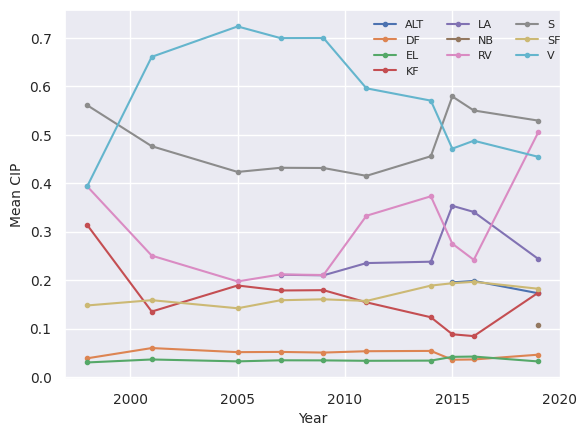

In [56]:
fig, ax = plt.subplots()
for k, v in grouped_df.groupby('party_abbr'):
    v.plot(x='year', y='mean', label=k, ax=ax, marker='o', markersize=3)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Mean CIP', fontsize=10)
plt.xticks(size=10)
plt.yticks(size=10)
plt.legend(frameon=False, fontsize=8, loc='upper right', ncol=3, bbox_to_anchor=(1.02, 1.0))
plt.show()

## Question 2: NumPy Arrays

We now turn to NumPy arrays. We continue working with the CIPs. 

### Exercise 2.1
Start by importing NumPy

### Solution 2.1

In [57]:
# Import NumPy here
import numpy as np

### Exercise 2.2
The first thing we do is to convert a pandas column to a NumPy array.

*Hint:* We can do this using the `.to_numpy()` method. Alternatively, you can simply use `np.array()`

### Solution 2.2

In [66]:
# One solution
features = grouped_df['mean'].to_numpy()
labels = grouped_df['party_abbr'].to_numpy()

In [139]:
# Another solution
features = np.array(grouped_df['mean'])
labels = np.array(grouped_df['party_abbr'])

### Exercise 2.3

Compute the shape of the two arrays. What are their dimensions?


### Solution 2.3

In [72]:
# Compute shape
features.shape, labels.shape

((81,), (81,))

### Exercise 2.4
We only want to work with the grand old parties. 
* 1 Subset the arrays based on the list given below. 
* 2 When this is done, recompute the shape. 
* 3 Make sure that the parties appear the same amount of time. You can test this using using the `np.unique(X, return_counts=True)` where `X` should be replaced with your array.

*Hint:* Use the `np.isin()` function. The syntax is `np.isin(element, test_elements)` where `element` should the be array and `test_elements` should be the list given below. The function returns an array with boolean values, which can be thought of as a mask. Use this to filter the arrays. Remember to filter both `features` and `labels`.

In [87]:
parties = ['KF', 'S', 'V', 'RV', 'SF']

### Solution 2.4

In [95]:
# Generate mask
mask = np.isin(labels, parties)

In [140]:
# Filter
features = features[mask]
labels = labels[mask]

In [97]:
# Recompute shape
features.shape, labels.shape

((50,), (50,))

In [99]:
# Use np.unique
np.unique(labels, return_counts=True)[1]

array([10, 10, 10, 10, 10])

### Exercise 2.5

Now that all parties appear the same, we are able to reshape the data. 

Reshape it into 5 by 10 array where each row corresponds to a party and each column is an yearly observation.

Save it in objects called `features_reshaped` and `labels_reshaped`.

### Solution 2.5

In [105]:
# Reshape arrays

# One solution
features_reshaped = features.reshape(5, -1)
labels_reshaped = labels.reshape(5, -1)

# Alternative solution
features_reshaped = features.reshape(5, 10)
labels_reshaped = labels.reshape(5, 10)

### Exercise 2.6

Check the dimensions of the arrays now. Are they as intended?

### Solution 2.6

In [107]:
features_reshaped.shape, labels_reshaped.shape

((5, 10), (5, 10))

### Exercise 2.7

We want to figure out each party's highest CIP at any point in time. 

Do this using the `np.max()` function. Pay attention to the dimension of the output. Is it as intended? What's the problem?

### Solution 2.7

In [ ]:
# Compute the maximum CIP for each party. 
np.max(features_reshaped)

### Exercise 2.8

The `np.max()` works, but we do not get a value for each party. Instead, it is pooled average whereas our intended dimension is (5,). This happens since we need to tell the function whether we want the row or column-wise mean. If nothing is specified, it returns the pooled average. 

We can control it using the `axis` argument, which must be either $0$ or $1$. Try computing the maximum value using first $0$ and then $1$. Which one is the correct version when we want to get each party's highest probability? Save the results in objects called `max_axis0` and `max_axis1`, respectively. 

### Solution 2.8

In [120]:
# Axis 0
max_axis0 = np.max(features_reshaped, axis=0)

In [121]:
# Axis 1
max_axis1 = np.max(features_reshaped, axis=1)

### Exercise 2.9

We can see from the output that the highest probability is the last index ([4] or [-1]). 

We want to figure out which party this corresponds to. Of course we can do this manually, but often we want an automated solution.

To do this, we can use the `np.argmax()` function on the `max_axis1` object to return the index of the highest probability. This will return [4] in this case. 

Use the index to figure out which party we are talking about by filtering the `labels_reshaped` using the output from the argmax.

If you have done it correct, it should return an array with 'V' (Venstre). 


### Solution 2.9

In [127]:
labels_reshaped[np.argmax(max_axis1)]

array(['V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V'], dtype=object)

### Exercise 2.10
We now return to our original `labels` object with shape (50,). 

The workflow with a `features` and `labels` setup is very common in machine learning. For some unknown reasons, many algorithms in Python assume that the output is two-dimensional. In most cases the `features` vector is N-dimensional. This is not the case here and as a result, it would cause problems. 

For the example here, we only reshape `labels` to shape (50, 1). Save the reshaped array in an object called `labels_new`. 

Verify that the result is correct using `.shape`. 

*Hint:* This can be done using both the `.reshape()` method and the `np.newaxis` function. Use the latter in this case.

### Solution 2.10

In [147]:
# One solution
labels_new = labels[:, np.newaxis]
labels_new.shape

(50, 1)

In [148]:
# Alternative solution
labels_new = labels.reshape(labels.shape[0], 1)           # I use labels.shape[0] to get the number of rows.
labels_new.shape

(50, 1)

## Question 3: Writing and Reading Files

### Exercise 3.1
We now want to write and read some files. Start by writing the newly reshaped array `labels_new`.

This can be done using both `np.save()` `np.savetxt()`. Try using both. Can you use both? If not, why?

When you have saved it, read in the saved file using the `np.load()` function. Save the data in an object called `labels_loaded`. 

*Hint:* You probably get an error when reading the file again. Read the error message and adapt your code. It should be straightforward.

### Solution 3.1

In [154]:
# np.save
np.save('/home/rask/Dropbox/teaching/css_fall2023/data/class2/labels_new_npsave', labels_new) 

In [ ]:
# np.savetxt
np.savetxt('/home/rask/Dropbox/teaching/css_fall2023/data/class2/labels_new_npsavetxt', labels_new) 

In [157]:
# np.load
labels_loaded = np.load('/home/rask/Dropbox/teaching/css_fall2023/data/class2/labels_new_npsave.npy', allow_pickle=True) 

### Exercise 3.2

We forgot to write our Pandas dataframe before. 

Write the `grouped_df` dataframe to a `.csv` file. Remember to specify `index=False`. 

When this is done, read the file back in. Save it in an object called `grouped_df_loaded`.

### Solution 2.12

In [160]:
# Write to csv
grouped_df.to_csv('/home/rask/Dropbox/teaching/css_fall2023/data/class2/partyyear-CPI.csv', index=False)

In [161]:
# Read as csv
grouped_df_loaded = pd.read_csv('/home/rask/Dropbox/teaching/css_fall2023/data/class2/partyyear-CPI.csv')